#**STAGE 2**

In [ ]:
!pip install opendatasets
!pip install category_encoders
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 6.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 185 kB 10.9 MB/s 
     |████████████████████████████████| 9.8 MB 54.0 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.2-py3-none-any.whl size=196206 sha256=c021141faf0a4352b32a8caba71d52991353ff9b29e4f87b26fbb9b0e0319f90
  Stored in directory: /root/.cache/pip/wheels/11/5a/63/a6d32fc26fa462c731f65480bfb98ff7bd39b8ebcb4bc6c2fe
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=5b0043aa471802955b19478c216a41c43c583e1d5a61637b6b4e6e9b0d602641
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Suc

In [ ]:
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
od.download("https://www.kaggle.com/datasets/mirbektoktogaraev/should-this-loan-be-approved-or-denied")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: aedentrisayp
Your Kaggle Key: ··········


100%|██████████| 46.4M/46.4M [00:00<00:00, 70.0MB/s]


In [ ]:
file=('/content/should-this-loan-be-approved-or-denied/SBAnational.csv')

In [ ]:
df = pd.read_csv(file,low_memory=False)
pd.set_option('display.max_columns', None)

df

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,27-Feb-97,1997,60,6,1.0,0,0,1,0,0,N,NaN,30-Sep-97,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00"
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,27-Feb-97,1997,60,6,1.0,0,0,1,0,Y,N,NaN,31-Oct-97,"$85,000.00",$0.00,P I F,$0.00,"$85,000.00","$42,500.00"
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,27-Feb-97,1997,108,26,1.0,0,0,1,0,N,N,NaN,30-Sep-97,"$300,000.00",$0.00,P I F,$0.00,"$300,000.00","$225,000.00"
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,27-Feb-97,1997,60,6,1.0,0,0,1,0,N,Y,8-Mar-00,31-Mar-97,"$75,000.00",$0.00,CHGOFF,"$46,383.00","$75,000.00","$60,000.00"


#Handling Missing Values & Duplicated Data

Data ini tidak memiliki data yang duplicate

Drop `ChgOffDate` didrop karena nilai missing values nya terlalu banyak yaitu 81.9%

In [ ]:
df.drop(columns=['ChgOffDate'], inplace=True)

In [ ]:
df.isna().sum()

LoanNr_ChkDgt           0
Name                   14
City                   30
State                  14
Zip                     0
Bank                 1559
BankState            1566
NAICS                   0
ApprovalDate            0
ApprovalFY              0
Term                    0
NoEmp                   0
NewExist              136
CreateJob               0
RetainedJob             0
FranchiseCode           0
UrbanRural              0
RevLineCr            4528
LowDoc               2582
DisbursementDate     2368
DisbursementGross       0
BalanceGross            0
MIS_Status           1997
ChgOffPrinGr            0
GrAppv                  0
SBA_Appv                0
dtype: int64

Jumlah missing values dalam persentase

In [ ]:
round(df.isnull().sum()/len(df)*100, 2)

LoanNr_ChkDgt        0.00
Name                 0.00
City                 0.00
State                0.00
Zip                  0.00
Bank                 0.17
BankState            0.17
NAICS                0.00
ApprovalDate         0.00
ApprovalFY           0.00
Term                 0.00
NoEmp                0.00
NewExist             0.02
CreateJob            0.00
RetainedJob          0.00
FranchiseCode        0.00
UrbanRural           0.00
RevLineCr            0.50
LowDoc               0.29
DisbursementDate     0.26
DisbursementGross    0.00
BalanceGross         0.00
MIS_Status           0.22
ChgOffPrinGr         0.00
GrAppv               0.00
SBA_Appv             0.00
dtype: float64

In [ ]:
df=df.dropna()

In [ ]:
df.isna().sum()

LoanNr_ChkDgt        0
Name                 0
City                 0
State                0
Zip                  0
Bank                 0
BankState            0
NAICS                0
ApprovalDate         0
ApprovalFY           0
Term                 0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementDate     0
DisbursementGross    0
BalanceGross         0
MIS_Status           0
ChgOffPrinGr         0
GrAppv               0
SBA_Appv             0
dtype: int64

Mengubah kolom `ApprovalDate, ChgOffDate, DisbursementDate` menjadi datetime

In [ ]:
df[['ApprovalDate', 'DisbursementDate']] = df[['ApprovalDate', 'DisbursementDate']].apply(pd.to_datetime)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Mengubah kolom DisbursementGross, BalanceGross, ChgOffPrinGr, GrAppv, SBA_Appv menjadi float

In [ ]:
df[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']].head()

,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,"$60,000.00",$0.00,$0.00,"$60,000.00","$48,000.00"
1,"$40,000.00",$0.00,$0.00,"$40,000.00","$32,000.00"
2,"$287,000.00",$0.00,$0.00,"$287,000.00","$215,250.00"
3,"$35,000.00",$0.00,$0.00,"$35,000.00","$28,000.00"
4,"$229,000.00",$0.00,$0.00,"$229,000.00","$229,000.00"


In [ ]:
df[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']]=df[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']].applymap(lambda x: x.replace('$', '').replace(',', ''))
df=df.astype({'DisbursementGross':'float', 'BalanceGross':'float', 'ChgOffPrinGr':'float', 'GrAppv':'float', 'SBA_Appv':'float'})
df[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']].head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,60000.0,0.0,0.0,60000.0,48000.0
1,40000.0,0.0,0.0,40000.0,32000.0
2,287000.0,0.0,0.0,287000.0,215250.0
3,35000.0,0.0,0.0,35000.0,28000.0
4,229000.0,0.0,0.0,229000.0,229000.0


Mengubah kolom `ApprovalFY` menjadi datetime (year)

In [ ]:
df['ApprovalFY'].apply(type).value_counts()

<class 'str'>    886240
Name: ApprovalFY, dtype: int64

In [ ]:
df['ApprovalFY'].unique()

array(['1997', '1980', '2006', '1998', '1999', '2000', '2001', '1972',
       '2003', '2004', '1978', '1979', '1981', '2005', '1982', '1983',
       '1973', '1984', '2007', '1985', '1986', '1987', '2008', '1988',
       '2009', '1989', '1991', '1990', '1974', '2010', '2011', '1992',
       '1993', '2002', '2012', '2013', '1994', '2014', '1975', '1977',
       '1976', '1968', '1976A', '1969', '1995', '1970', '1996', '1971'],
      dtype=object)

Dalam data di atas terdapat tipe data integer dan string. Dimana contoh value dari tipe data string adalah '1976A', karena itu pertama-tama kita perlu menghilangkan huruf A terlebih dahulu kemudian mengubah tipe datanya menjadi integer

In [ ]:
def clean_str(x):
    if isinstance(x,str):
        return x.replace('A','')
    return x
df['ApprovalFY']=df['ApprovalFY'].apply(clean_str).astype('int')
df['ApprovalFY'].apply(type).value_counts()

<class 'int'>    886240
Name: ApprovalFY, dtype: int64

Memisahkan kolom `ApprovalDate, ChgOffDate, DisbursementDate` berdasarkan tahun, bulan, dan hari

Kolom `ApprovalDate`

In [ ]:
df['ApprovalYear'] = pd.DatetimeIndex(df['ApprovalDate']).year
print (df['ApprovalYear'].min())
print (df['ApprovalYear'].max())

1972
2071


In [ ]:
df['ApprovalMonth'] = pd.DatetimeIndex(df['ApprovalDate']).month
print (df['ApprovalMonth'].min())
print (df['ApprovalMonth'].max())

1
12


In [ ]:
df['ApprovalDay'] = pd.DatetimeIndex(df['ApprovalDate']).day
print (df['ApprovalDay'].min())
print (df['ApprovalDay'].max())

1
31


Kolom `Disbursement Date`

In [ ]:
df['DisbursementYear'] = pd.DatetimeIndex(df['DisbursementDate']).year
print (df['DisbursementYear'].min())
print (df['DisbursementYear'].max())

1972
2071


In [ ]:
df['DisbursementMonth'] = pd.DatetimeIndex(df['DisbursementDate']).month
print (df['DisbursementMonth'].min())
print (df['DisbursementMonth'].max())

1
12


In [ ]:
df['DisbursementDay'] = pd.DatetimeIndex(df['DisbursementDate']).day
print (df['DisbursementDay'].min())
print (df['DisbursementDay'].max())

1
31


In [ ]:
df[['DisbursementYear','ApprovalYear']].sort_values('ApprovalYear', ascending= 'True').tail(70)

,DisbursementYear,ApprovalYear
656684,2014,2014
656665,2014,2014
656728,2014,2014
658341,2014,2014
658262,2014,2014
...,...,...
38362,2071,2071
7509,2071,2071
7454,2071,2071
804226,2071,2071


Dari hasil di atas, dapat diliahat adanya data yang tidak masuk akal di mana DisbursementYear dan ApprovalYear memiliki value 2071 yang tidak masuk akal dengan data lainnya. Oleh karena itu, DisbursementYear dan ApprovalYear yang tahunnya di atas 2020 akan didrop.

In [ ]:
df.drop(df[df.ApprovalYear == 2071].index, inplace=True)

In [ ]:
df[['DisbursementYear','ApprovalYear']].sort_values('ApprovalYear', ascending= 'True').tail(70)

,DisbursementYear,ApprovalYear
657519,2014,2014
657386,2014,2014
657383,2014,2014
657313,2014,2014
660711,2014,2014
...,...,...
766960,2070,2070
767019,2070,2070
772962,2070,2070
785511,2071,2070


Mengekstrak target `MIS_Status` yang berisi 'PIF' dan 'ChgOff' menjadi binari 0 dan 1

In [ ]:
df['Default'] = np.where(df['MIS_Status'] == 'P I F', 0, 1)
df['Default'].value_counts()

0    730197
1    156029
Name: Default, dtype: int64

Mengubah value feature `RevLineCr` dan `LowDoc` agar menjadi binari dengan value 'Y' dan 'N'. Kemudian kita convert value Y menjadi 1 dan value N serta '0'  dalam feature `RevLineCr` menjadi 0.

In [ ]:
df['RevLineCr'].unique()

array(['N', '0', 'Y', 'T', '`', ',', '1', 'C', '3', '2', 'R', '7', 'A',
       '5', '.', '4', '-', 'Q'], dtype=object)

In [ ]:
df['LowDoc'].unique()

array(['Y', 'N', 'C', '1', 'S', 'R', 'A', '0'], dtype=object)

In [ ]:
#Mengambil value 'Y' dan 'N' saja
df = df[(df['RevLineCr'] == 'Y') | (df['RevLineCr'] == 'N') | (df['RevLineCr'] == '0')]
df = df[(df['LowDoc'] == 'Y') | (df['LowDoc'] == 'N')]

#Mengubah value 'N' dan 'Y' menjadi binari '0' dan '1'
df['RevLineCr'] = np.where(df['RevLineCr'] == 'Y', 1, 0)
df['LowDoc'] = np.where(df['LowDoc'] == 'N', 0, 1)

#Mengecek ulang
print(df['RevLineCr'].unique())
print(df['LowDoc'].unique())

[0 1]
[1 0]


Mengubah feature `NewExist` menjadi binari 0 (old) dan 1 (new) dan value sebelumnya yang berisi 1 (old) dan 2 (new).

Awalnya feature ini memiliki 3 value, yaitu 1.0, 2.0, dan 0.0. Karena jumlah value 0.0 hanya 0.16% sehingga tidak begitu memengaruhi keseluruhan dataset, maka kita memutuskan untuk drop value 0.0.

In [ ]:
df = df[(df['NewExist'] == 1.0) | (df['NewExist'] == 2.0)]
df['NewExist'] = np.where(df['NewExist'] == 1.0, 0, 1.0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df['NewExist'].value_counts()

0.0    622091
1.0    244807
Name: NewExist, dtype: int64

Mengubah feature `FranchiseCode` yang bentuknya float menjadi binari agar lebih mudah dianalisis. Kode 00000 atau 00001 menandakan tidak punya franchise, sehingga bisnis yang memiliki kode >1 berarti memiliki franchise

In [ ]:
df.loc[(df['FranchiseCode'] <= 1), 'IsFranchise'] = 0
df.loc[(df['FranchiseCode'] > 1), 'IsFranchise'] = 1

Mengubah kode `NAICS` menjadi industri

In [ ]:
df['Industry'] = df['NAICS'].astype('str').apply(lambda x: x[:2])

In [ ]:
df['Industry'] = df['Industry'].map({
    '11': 'Ag/For/Fish/Hunt',
    '21': 'Min/Quar/Oil_Gas_ext',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale_trade',
    '44': 'Retail_trade',
    '45': 'Retail_trade',
    '48': 'Trans/Ware',
    '49': 'Trans/Ware',
    '51': 'Information',
    '52': 'Finance/Insurance',
    '53': 'RE/Rental/Lease',
    '54': 'Prof/Science/Tech',
    '55': 'Mgmt_comp',
    '56': 'Admin_sup/Waste_Mgmt_Rem',
    '61': 'Educational',
    '62': 'Healthcare/Social_assist',
    '71': 'Arts/Entertain/Rec',
    '72': 'Accom/Food_serv',
    '81': 'Other_no_pub',
    '92': 'Public_Admin'
})
df['Industry'].value_counts()

Retail_trade                122647
Other_no_pub                 70130
Accom/Food_serv              65864
Manufacturing                65524
Prof/Science/Tech            64923
Construction                 63612
Healthcare/Social_assist     53582
Wholesale_trade              46639
Admin_sup/Waste_Mgmt_Rem     30935
Trans/Ware                   21479
Arts/Entertain/Rec           14142
RE/Rental/Lease              13085
Information                  10910
Finance/Insurance             9085
Ag/For/Fish/Hunt              8793
Educational                   6132
Min/Quar/Oil_Gas_ext          1799
Utilities                      640
Mgmt_comp                      254
Public_Admin                   218
Name: Industry, dtype: int64

Kami memutuskan untuk drop feature `UrbanRural` karena jumlah missing values nya yang cukup besar yaitu 35% (ada di stage 1) dan tidak ada cara yang tepat untuk impute missing values tersebut.

In [ ]:
#Perubahan value pada kolom `UrbanRural` selain '1' dan '2' 
df['UrbanRural']=df['UrbanRural']
m = (~df['UrbanRural'].isin(['1','2']) )
df.loc[m, 'UrbanRural'] = np.nan

In [ ]:
df['UrbanRural'].value_counts()

Series([], Name: UrbanRural, dtype: int64)

In [ ]:
df.drop(columns=['UrbanRural'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 866898 entries, 0 to 899163
Data columns (total 34 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   LoanNr_ChkDgt      866898 non-null  int64         
 1   Name               866898 non-null  object        
 2   City               866898 non-null  object        
 3   State              866898 non-null  object        
 4   Zip                866898 non-null  int64         
 5   Bank               866898 non-null  object        
 6   BankState          866898 non-null  object        
 7   NAICS              866898 non-null  int64         
 8   ApprovalDate       866898 non-null  datetime64[ns]
 9   ApprovalFY         866898 non-null  int64         
 10  Term               866898 non-null  int64         
 11  NoEmp              866898 non-null  int64         
 12  NewExist           866898 non-null  float64       
 13  CreateJob          866898 non-null  int64   

In [ ]:
df['GrAppv'].describe()

count    8.668980e+05
mean     1.953501e+05
std      2.845705e+05
min      1.000000e+03
25%      3.500000e+04
50%      9.400000e+04
75%      2.300000e+05
max      5.000000e+06
Name: GrAppv, dtype: float64

#Handling Outliers

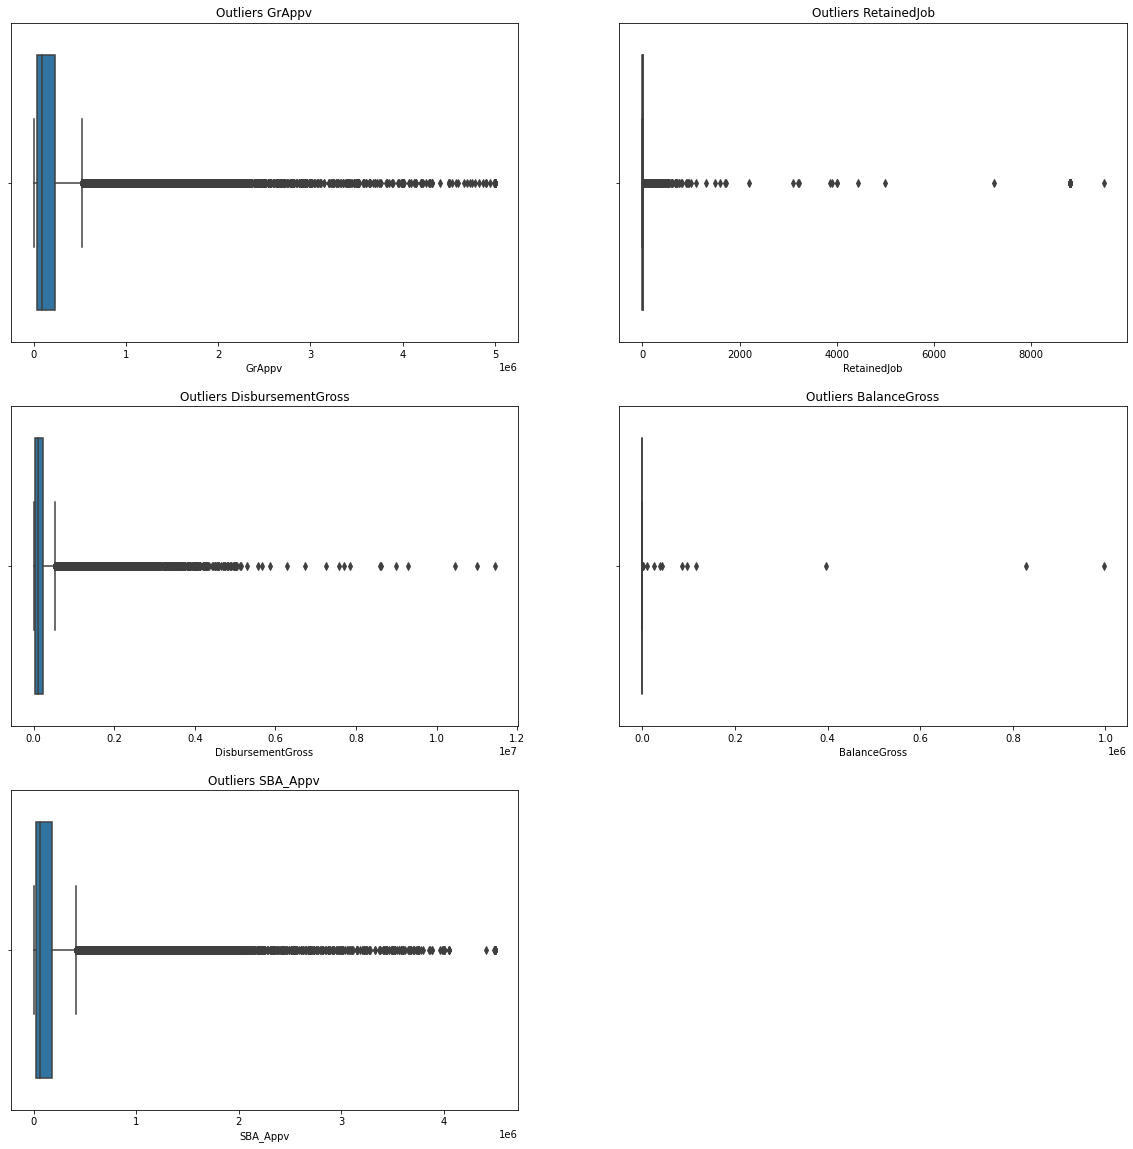

In [ ]:
#melihat data outlier menggunakan ploting boxplot
plt.figure(figsize=(20, 20))

plt.subplot(321)
sns.boxplot(x =df['GrAppv'])
plt.title('Outliers GrAppv')

plt.subplot(322)
sns.boxplot(x =df['RetainedJob'])
plt.title('Outliers RetainedJob')

plt.subplot(323)
sns.boxplot(x =df['DisbursementGross'])
plt.title('Outliers DisbursementGross');

plt.subplot(324)
sns.boxplot(x =df['BalanceGross'])
plt.title('Outliers BalanceGross');

plt.subplot(325)
sns.boxplot(x =df['SBA_Appv'])
plt.title('Outliers SBA_Appv');


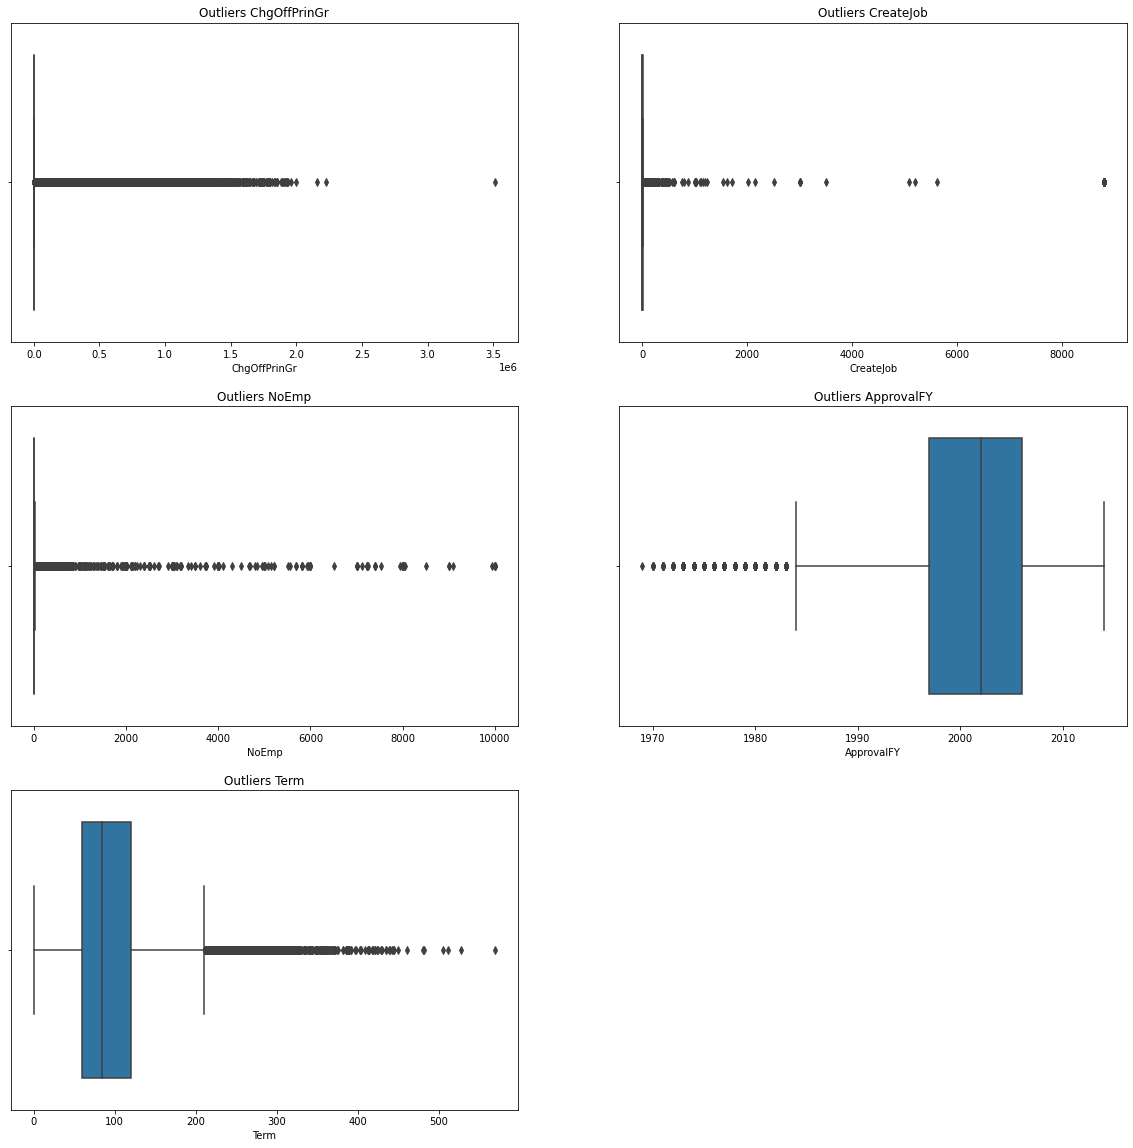

In [ ]:
#melihat data outlier menggunakan ploting boxplot
plt.figure(figsize=(20, 20))

plt.subplot(321)
sns.boxplot(x =df['ChgOffPrinGr'])
plt.title('Outliers ChgOffPrinGr');

plt.subplot(322)
sns.boxplot(x =df['CreateJob'])
plt.title('Outliers CreateJob');

plt.subplot(323)
sns.boxplot(x =df['NoEmp'])
plt.title('Outliers NoEmp');

plt.subplot(324)
sns.boxplot(x =df['ApprovalFY'])
plt.title('Outliers ApprovalFY');

plt.subplot(325)
sns.boxplot(x =df['Term'])
plt.title('Outliers Term');

In [ ]:
def remove_outlier3(data, column):
    Q1 = np.percentile(data[column], 25,interpolation = 'midpoint')
    Q3 = np.percentile(data[column], 75,interpolation = 'midpoint')
    IQR = Q3 - Q1
    print("Old Shape: ", data[column].shape)
    lower = data[column]<=(Q1-1.5*IQR)
    upper = data[column]>= (Q3+1.5*IQR)
    data_final = data[(~upper) & (~lower)]
    print("New Shape: ", data_final.shape)
    return data_final

In [ ]:
df=remove_outlier3(df, "GrAppv")
df.shape

Old Shape:  (866898,)
New Shape:  (784984, 34)


(784984, 34)

Kami memutuskan untuk menghapus outlier dari feature `GrAppv` karena jika dilihat dari boxplot memiliki jumlah outlier terbanyak. Value `GrAppv` yang memiliki outlier sebesar 81.914 baris data.

In [ ]:
df['GrAppv'].describe()

count    784984.000000
mean     120859.770581
std      121008.698064
min        1000.000000
25%       30000.000000
50%       75000.000000
75%      165000.000000
max      522400.000000
Name: GrAppv, dtype: float64

Text(0.5, 1.0, 'Outliers GrAppv')

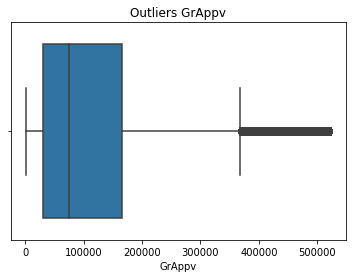

In [ ]:
sns.boxplot(x =df['GrAppv'])
plt.title('Outliers GrAppv')

#Feature Transformation

Melakukan transformation pada feature numeric

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df[['GrAppv','RetainedJob','DisbursementGross','BalanceGross','SBA_Appv','NoEmp','ApprovalFY','ChgOffPrinGr','CreateJob','Term']].describe()

,GrAppv,RetainedJob,DisbursementGross,BalanceGross,SBA_Appv,NoEmp,ApprovalFY,ChgOffPrinGr,CreateJob,Term
count,784984.000000,784984.000000,7.849840e+05,784984.000000,784984.000000,784984.000000,784984.000000,7.849840e+05,784984.000000,784984.000000
mean,120859.770581,10.909343,1.305139e+05,0.368303,92463.937139,9.797940,2001.141591,1.018187e+04,8.707904,101.710483
std,121008.698064,249.460533,1.320411e+05,161.270191,101170.311489,73.414492,5.926751,3.643438e+04,249.224951,71.768321
min,1000.000000,0.000000,4.000000e+03,0.000000,500.000000,0.000000,1969.000000,0.000000e+00,0.000000,0.000000
25%,30000.000000,0.000000,3.950000e+04,0.000000,19500.000000,2.000000,1997.000000,0.000000e+00,0.000000,60.000000
50%,75000.000000,1.000000,8.625200e+04,0.000000,50000.000000,4.000000,2003.000000,0.000000e+00,0.000000,84.000000
75%,165000.000000,4.000000,1.787000e+05,0.000000,127500.000000,9.000000,2006.000000,0.000000e+00,1.000000,120.000000
max,522400.000000,9500.000000,4.029520e+06,96908.000000,522000.000000,9999.000000,2014.000000,1.121270e+06,8800.000000,569.000000


In [ ]:
#normalisasi 

df['Term'] = MinMaxScaler().fit_transform(df['Term'].values.reshape(len(df),1))
df['NoEmp'] = MinMaxScaler().fit_transform(df['NoEmp'].values.reshape(len(df),1))
df['ApprovalFY'] = MinMaxScaler().fit_transform(df['ApprovalFY'].values.reshape(len(df),1))
df['CreateJob'] = MinMaxScaler().fit_transform(df['CreateJob'].values.reshape(len(df),1))
df['RetainedJob'] = MinMaxScaler().fit_transform(df['RetainedJob'].values.reshape(len(df),1))
df['GrAppv'] = MinMaxScaler().fit_transform(df['GrAppv'].values.reshape(len(df),1))
df['DisbursementGross'] = MinMaxScaler().fit_transform(df['DisbursementGross'].values.reshape(len(df),1))
df['BalanceGross'] = MinMaxScaler().fit_transform(df['BalanceGross'].values.reshape(len(df),1))
df['SBA_Appv'] = MinMaxScaler().fit_transform(df['SBA_Appv'].values.reshape(len(df),1))
df['ChgOffPrinGr'] = MinMaxScaler().fit_transform(df['ChgOffPrinGr'].values.reshape(len(df),1))

In [ ]:
df[['GrAppv','RetainedJob','DisbursementGross','BalanceGross','SBA_Appv','NoEmp','ApprovalFY','ChgOffPrinGr','CreateJob','Term']].describe()

,GrAppv,RetainedJob,DisbursementGross,BalanceGross,SBA_Appv,NoEmp,ApprovalFY,ChgOffPrinGr,CreateJob,Term
count,784984.000000,784984.000000,784984.000000,784984.000000,784984.000000,784984.000000,784984.000000,784984.000000,784984.000000,784984.000000
mean,0.229881,0.001148,0.031428,0.000004,0.176345,0.000980,0.714258,0.009081,0.000990,0.178753
std,0.232084,0.026259,0.032801,0.001664,0.193999,0.007342,0.131706,0.032494,0.028321,0.126131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.055619,0.000000,0.008819,0.000000,0.036433,0.000200,0.622222,0.000000,0.000000,0.105448
50%,0.141926,0.000105,0.020433,0.000000,0.094919,0.000400,0.755556,0.000000,0.000000,0.147627
75%,0.314538,0.000421,0.043398,0.000000,0.243528,0.000900,0.822222,0.000000,0.000114,0.210896
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Normalisasi adalah teknik untuk mengubah value kolom numeric menjadi scale yang umum.


Kami memilih normalisasi karena karena pada saat mencoba standarisasi, value dari fitur numeric menjadi (-).

#Feature Encoding setelah feature selection

In [ ]:
binary_encode = ['NewExists', 'FranchiseCode' 'RevLineCr', 'LowDoc', 'MIS_Status', 'is_franchise', 'Default']

Untuk feature  `NewExists, FranchiseCode, RevLineCr, LowDoc, MIS_Status, is_franchise, Default` sudah kami lakukan encoding secara manual, maka dari itu kami tampung ke dalam variable *binary_encode*.

In [ ]:
import category_encoders as ce

In [ ]:
ce_be_Name = ce.BinaryEncoder(cols=['Name'])
data_binary_Name = ce_be_Name.fit_transform(df["Name"])
print(df["Name"])
data_binary_Name

0                         ABC HOBBYCRAFT
1            LANDMARK BAR & GRILLE (THE)
2                  WHITLOCK DDS, TODD M.
3          BIG BUCKS PAWN & JEWELRY, LLC
4            ANASTASIA CONFECTIONS, INC.
                       ...              
899159                      FABRIC FARMS
899160                      FABRIC FARMS
899161      RADCO MANUFACTURING CO.,INC.
899162             MARUTAMA HAWAII, INC.
899163    PACIFIC TRADEWINDS FAN & LIGHT
Name: Name, Length: 784984, dtype: object


,Name_0,Name_1,Name_2,Name_3,Name_4,Name_5,Name_6,Name_7,Name_8,Name_9,Name_10,Name_11,Name_12,Name_13,Name_14,Name_15,Name_16,Name_17,Name_18,Name_19
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,1,0,1,0,0,1,1,1,1,1,1,0,1,1,0,1,1,0,0,1
899160,1,0,1,0,0,1,1,1,1,1,1,0,1,1,0,1,1,0,0,1
899161,1,0,1,0,0,1,1,1,1,1,1,0,1,1,0,1,1,0,1,0
899162,1,0,1,0,0,1,1,1,1,1,1,0,1,1,0,1,1,0,1,1


In [ ]:
ce_be_City = ce.BinaryEncoder(cols=['City'])
data_binary_City = ce_be_City.fit_transform(df["City"])
print(df["City"])
data_binary_City

0              EVANSVILLE
1               NEW PARIS
2             BLOOMINGTON
3            BROKEN ARROW
4                 ORLANDO
               ...       
899159    UPPER ARLINGTON
899160           COLUMBUS
899161        SANTA MARIA
899162           HONOLULU
899163             KAILUA
Name: City, Length: 784984, dtype: object


,City_0,City_1,City_2,City_3,City_4,City_5,City_6,City_7,City_8,City_9,City_10,City_11,City_12,City_13,City_14
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,0,1,0,1,0,0,0,0,0,0,1,1,1,1,0
899160,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
899161,0,0,0,0,1,1,1,1,1,0,0,1,1,0,0
899162,0,0,0,0,1,0,1,0,1,0,1,1,0,1,0


In [ ]:
ce_be_State = ce.BinaryEncoder(cols=['State'])
data_binary_State = ce_be_State.fit_transform(df["State"])
print(df["State"])
data_binary_State

0         IN
1         IN
2         IN
3         OK
4         FL
          ..
899159    OH
899160    OH
899161    CA
899162    HI
899163    HI
Name: State, Length: 784984, dtype: object


,State_0,State_1,State_2,State_3,State_4,State_5
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,1,0
4,0,0,0,0,1,1
...,...,...,...,...,...,...
899159,0,1,0,0,1,1
899160,0,1,0,0,1,1
899161,0,0,1,1,1,1
899162,1,1,0,0,0,1


In [ ]:
ce_be_Zip = ce.BinaryEncoder(cols=['Zip'])
data_binary_Zip = ce_be_Zip.fit_transform(df["Zip"])
print(df["Zip"])
data_binary_Zip

0         47711
1         46526
2         47401
3         74012
4         32801
          ...  
899159    43221
899160    43221
899161    93455
899162    96830
899163    96734
Name: Zip, Length: 784984, dtype: int64


,Zip_0,Zip_1,Zip_2,Zip_3,Zip_4,Zip_5,Zip_6,Zip_7,Zip_8,Zip_9,Zip_10,Zip_11,Zip_12,Zip_13,Zip_14
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,0,0,0,1,0,0,1,0,0,1,1,0,1,1,0
899160,0,0,0,1,0,0,1,0,0,1,1,0,1,1,0
899161,0,0,0,1,0,1,1,0,0,1,0,0,0,0,1
899162,1,1,1,0,0,1,1,1,0,0,1,0,0,0,0


In [ ]:
ce_be_Bank = ce.BinaryEncoder(cols=['Bank'])
data_binary_Bank = ce_be_Bank.fit_transform(df["Bank"])
print(df["Bank"])
data_binary_Bank

0                       FIFTH THIRD BANK
1                        1ST SOURCE BANK
2                GRANT COUNTY STATE BANK
3          1ST NATL BK & TR CO OF BROKEN
4                FLORIDA BUS. DEVEL CORP
                       ...              
899159    JPMORGAN CHASE BANK NATL ASSOC
899160    JPMORGAN CHASE BANK NATL ASSOC
899161    RABOBANK, NATIONAL ASSOCIATION
899162                    BANK OF HAWAII
899163              CENTRAL PACIFIC BANK
Name: Bank, Length: 784984, dtype: object


,Bank_0,Bank_1,Bank_2,Bank_3,Bank_4,Bank_5,Bank_6,Bank_7,Bank_8,Bank_9,Bank_10,Bank_11,Bank_12
0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,0,0,0,0,0,0,0,1,0,0,0,0,0
899160,0,0,0,0,0,0,0,1,0,0,0,0,0
899161,0,0,0,0,0,0,0,1,1,1,0,0,0
899162,0,0,0,0,0,1,1,1,0,0,0,0,1


In [ ]:
ce_be_BankState = ce.BinaryEncoder(cols=['BankState'])
data_binary_BankState = ce_be_BankState.fit_transform(df["BankState"])
print(df["BankState"])
data_binary_BankState

0         OH
1         IN
2         IN
3         OK
4         FL
          ..
899159    IL
899160    IL
899161    CA
899162    HI
899163    HI
Name: BankState, Length: 784984, dtype: object


,BankState_0,BankState_1,BankState_2,BankState_3,BankState_4,BankState_5
0,0,0,0,0,0,1
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,0,0,1,1
4,0,0,0,1,0,0
...,...,...,...,...,...,...
899159,0,1,1,0,0,1
899160,0,1,1,0,0,1
899161,0,1,1,0,0,0
899162,1,1,0,0,1,0


In [ ]:
ce_be_Industry = ce.BinaryEncoder(cols=['Industry'])
data_binary_Industry = ce_be_Industry.fit_transform(df["Industry"])
print(df["Industry"])
data_binary_Industry

0                     Retail_trade
1                  Accom/Food_serv
2         Healthcare/Social_assist
3                              NaN
4                              NaN
                    ...           
899159                Retail_trade
899160                Retail_trade
899161               Manufacturing
899162                         NaN
899163                         NaN
Name: Industry, Length: 784984, dtype: object


,Industry_0,Industry_1,Industry_2,Industry_3,Industry_4
0,0,0,0,0,1
1,0,0,0,1,0
2,0,0,0,1,1
3,0,0,1,0,0
4,0,0,1,0,0
...,...,...,...,...,...
899159,0,0,0,0,1
899160,0,0,0,0,1
899161,0,0,1,0,1
899162,0,0,1,0,0


Kami putuskan untuk melakukan category encoders pada feature yang memiliki kardinalitas yang tinggi, yaitu pada feature `Name, City, State, Zip, Bank, BankState, Industry `, yang mana pada saat diencoding akan terbentuk kolom baru yang mewakilkan tiap category. 

Kami tidak melakukan 

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Name'] = label_encoder.fit_transform(df['Name'])
df['City'] = label_encoder.fit_transform(df['City'])
df['State'] = label_encoder.fit_transform(df['State'])
df['Zip'] = label_encoder.fit_transform(df['Zip'])
df['Bank'] = label_encoder.fit_transform(df['Bank'])
df['BankState'] = label_encoder.fit_transform(df['BankState'])
df['Industry'] = label_encoder.fit_transform(df['Industry'])
df['MIS_Status'] = label_encoder.fit_transform(df['MIS_Status'])

In [ ]:
#anova

import statsmodels.api as sm
from statsmodels.formula.api import ols
anova_name = ols('Name ~ MIS_Status', data=df).fit()
anova_city = ols('City ~ MIS_Status', data=df).fit()
anova_state = ols('State ~ MIS_Status', data=df).fit()
anova_zip = ols('Zip ~ MIS_Status', data=df).fit()
anova_bank = ols('Bank ~ MIS_Status', data=df).fit()
anova_bs = ols('BankState ~ MIS_Status', data=df).fit()
anova_industry = ols('Industry ~ MIS_Status', data=df).fit()

In [ ]:
residual1=anova_name.resid
residual2=anova_city.resid
residual3=anova_state.resid
residual4=anova_zip.resid
residual5=anova_bank.resid
residual6=anova_bs.resid
residual7=anova_industry.resid

In [ ]:
import scipy.stats as stats
stats.shapiro(residual1)
stats.shapiro(residual2)
stats.shapiro(residual3)
stats.shapiro(residual4)
stats.shapiro(residual5)
stats.shapiro(residual6)
stats.shapiro(residual7)

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9067314267158508, pvalue=0.0)

Text(0.5, 1.0, "Probability plot of Industry ~ MIS_Status residual's")

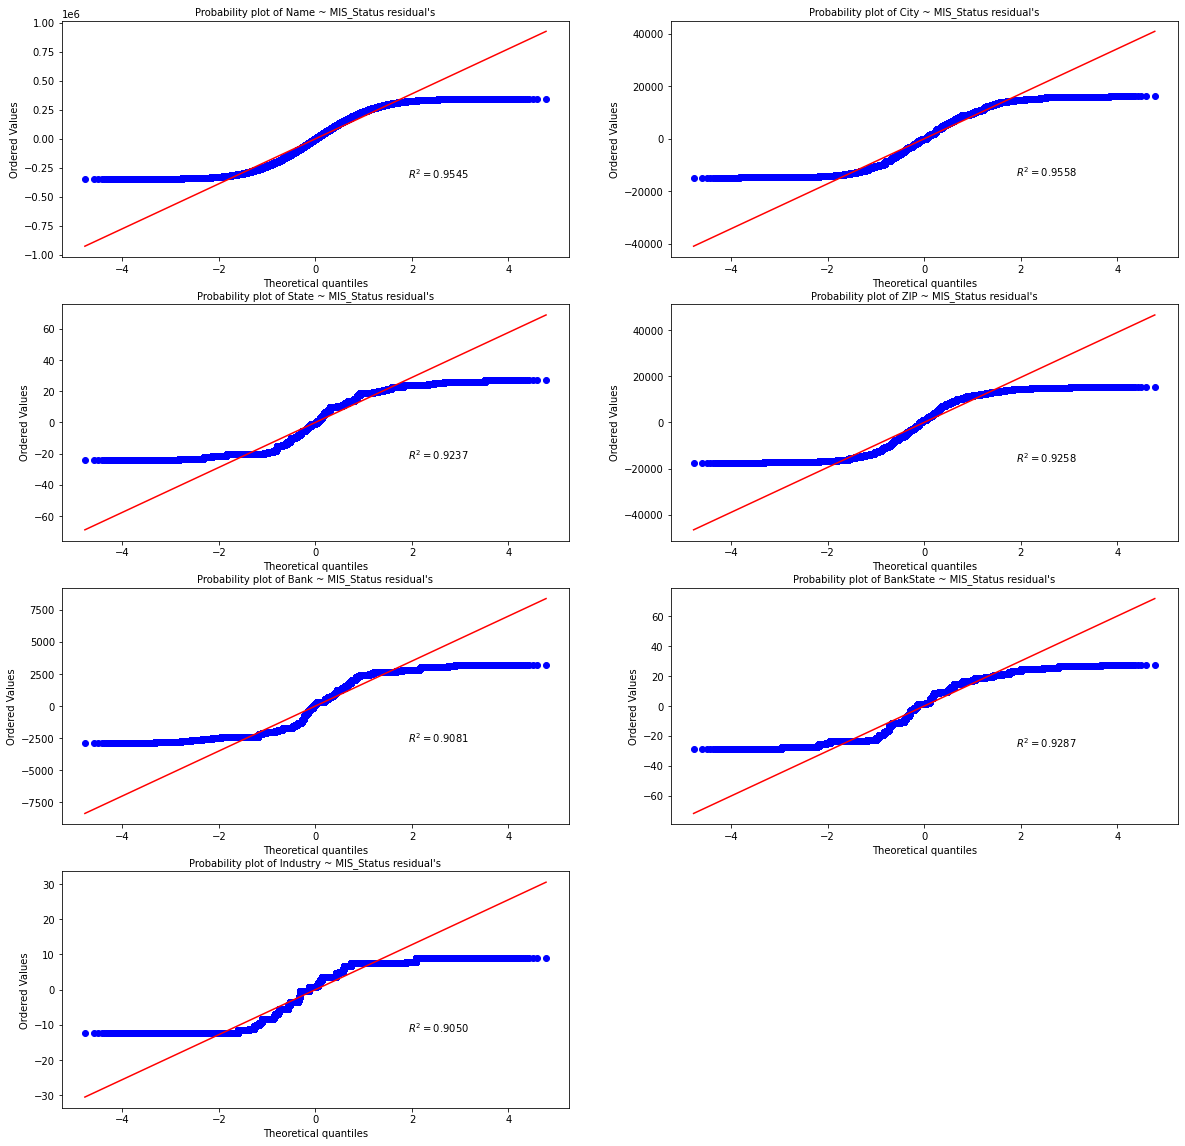

In [ ]:
fig = plt.figure(figsize= (20, 20))


plt.subplot(421)
normality_plot, stat = stats.probplot(residual1, plot= plt, rvalue= True)
plt.title("Probability plot of Name ~ MIS_Status residual's", fontsize= 10)

plt.subplot(422)
normality_plot, stat = stats.probplot(residual2, plot= plt, rvalue= True)
plt.title("Probability plot of City ~ MIS_Status residual's", fontsize= 10)

plt.subplot(423)
normality_plot, stat = stats.probplot(residual3, plot= plt, rvalue= True)
plt.title("Probability plot of State ~ MIS_Status residual's", fontsize= 10)


plt.subplot(424)
normality_plot, stat = stats.probplot(residual4, plot= plt, rvalue= True)
plt.title("Probability plot of ZIP ~ MIS_Status residual's", fontsize= 10)


plt.subplot(425)
normality_plot, stat = stats.probplot(residual5, plot= plt, rvalue= True)
plt.title("Probability plot of Bank ~ MIS_Status residual's", fontsize= 10)


plt.subplot(426)
normality_plot, stat = stats.probplot(residual6, plot= plt, rvalue= True)
plt.title("Probability plot of BankState ~ MIS_Status residual's", fontsize= 10)


plt.subplot(427)
normality_plot, stat = stats.probplot(residual7, plot= plt, rvalue= True)
plt.title("Probability plot of Industry ~ MIS_Status residual's", fontsize= 10)

In [ ]:
import pingouin as pg
print ("Name:")
print(pg.homoscedasticity(df, dv='Name', group='MIS_Status'))
print ("")


print ("City:")
print(pg.homoscedasticity(df, dv='City', group='MIS_Status'))
print ("")

print ("State:")
print(pg.homoscedasticity(df, dv='State', group='MIS_Status'))
print ("")

print ("Zip:")
print(pg.homoscedasticity(df, dv='Zip', group='MIS_Status'))
print ("")

print ("Bank:")
print(pg.homoscedasticity(df, dv='Bank', group='MIS_Status'))
print ("")

print ("BankState:")
print(pg.homoscedasticity(df, dv='BankState', group='MIS_Status'))
print ("")

print ("Industry:")
print(pg.homoscedasticity(df, dv='Industry', group='MIS_Status'))
print ("")

Name:
               W      pval  equal_var
levene  5.312281  0.021176      False

City:
                 W          pval  equal_var
levene  205.060671  1.665018e-46      False

State:
                 W          pval  equal_var
levene  149.348319  2.423983e-34      False

Zip:
               W      pval  equal_var
levene  0.238217  0.625497       True

Bank:
                 W           pval  equal_var
levene  454.728382  7.208008e-101      False

BankState:
                 W           pval  equal_var
levene  766.391323  1.320647e-168      False

Industry:
                W          pval  equal_var
levene  96.916752  7.252538e-23      False



In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

coba2 = ols('MIS_Status~ Name+City+State+Zip+Bank+BankState+Industry', data=df).fit()

tabel_anova = sm.stats.anova_lm(coba2, typ=2)
print(tabel_anova)

                  sum_sq        df            F         PR(>F)
Name            0.255169       1.0     1.746601   1.863050e-01
City            8.282285       1.0    56.691337   5.104172e-14
State         115.805665       1.0   792.677143  2.577863e-174
Zip             3.206910       1.0    21.950948   2.797554e-06
Bank          648.957456       1.0  4442.042974   0.000000e+00
BankState       0.866367       1.0     5.930190   1.488386e-02
Industry      642.479008       1.0  4397.698707   0.000000e+00
Residual   114680.571660  784976.0          NaN            NaN


Kesimpulan:

* Feature `Name` dan `BankState` tidak berkorelasi dengan Feature Target `MIS_Status` karena memiliki nilai Pr>F  yang lebih besar (>) dari 0.05.
* Feature `City`, `State`, `Bank`,`Zip` dan `Industry`  berkorelasi dengan Feature Target `MIS_Status` karena memiliki nilai Pr>F  yang lebih kecil (<) dari 0.05.

#Class Imbalance

Untuk modelling nanti kami akan gunakan 3 model dan akan kami bandingkan:

*   XGBoost
*   RandomForest
*   Decision Tree



#Feature Engineering

##Feature Selection 

Feature Nums dengan target Kategorik : ANOVA feature selection

**Perhitungan menggunakan metode lain, ANOVA, sudah kami gunakan pada fitur encoding**

In [ ]:
nums=['ApprovalFY','Term', 'NoEmp', 'CreateJob', 'RetainedJob','FranchiseCode','DisbursementGross', 'BalanceGross', 'ChgOffPrinGr','GrAppv','SBA_Appv']

In [ ]:
df[nums].corr()

,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,FranchiseCode,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
ApprovalFY,1.000000,-0.331877,-0.051260,-0.070824,-0.064949,-0.016811,-0.162332,0.002734,0.067337,-0.254635,-0.313830
Term,-0.331877,1.000000,0.033834,0.033029,0.030300,0.002941,0.434134,-0.000749,-0.122062,0.528754,0.575749
NoEmp,-0.051260,0.033834,1.000000,0.008003,0.011638,0.007949,0.068336,-0.000027,0.000832,0.074081,0.076479
CreateJob,-0.070824,0.033029,0.008003,1.000000,0.995730,0.000490,0.018744,-0.000038,0.014733,0.023330,0.033144
RetainedJob,-0.064949,0.030300,0.011638,0.995730,1.000000,-0.000657,0.020376,-0.000037,0.014878,0.023191,0.031590
FranchiseCode,-0.016811,0.002941,0.007949,0.000490,-0.000657,1.000000,0.042419,0.002085,0.038548,0.062825,0.064924
DisbursementGross,-0.162332,0.434134,0.068336,0.018744,0.020376,0.042419,1.000000,-0.000211,0.154184,0.907317,0.860187
BalanceGross,0.002734,-0.000749,-0.000027,-0.000038,-0.000037,0.002085,-0.000211,1.000000,-0.000638,-0.000147,-0.000802
ChgOffPrinGr,0.067337,-0.122062,0.000832,0.014733,0.014878,0.038548,0.154184,-0.000638,1.000000,0.153116,0.122067
GrAppv,-0.254635,0.528754,0.074081,0.023330,0.023191,0.062825,0.907317,-0.000147,0.153116,1.000000,0.976395


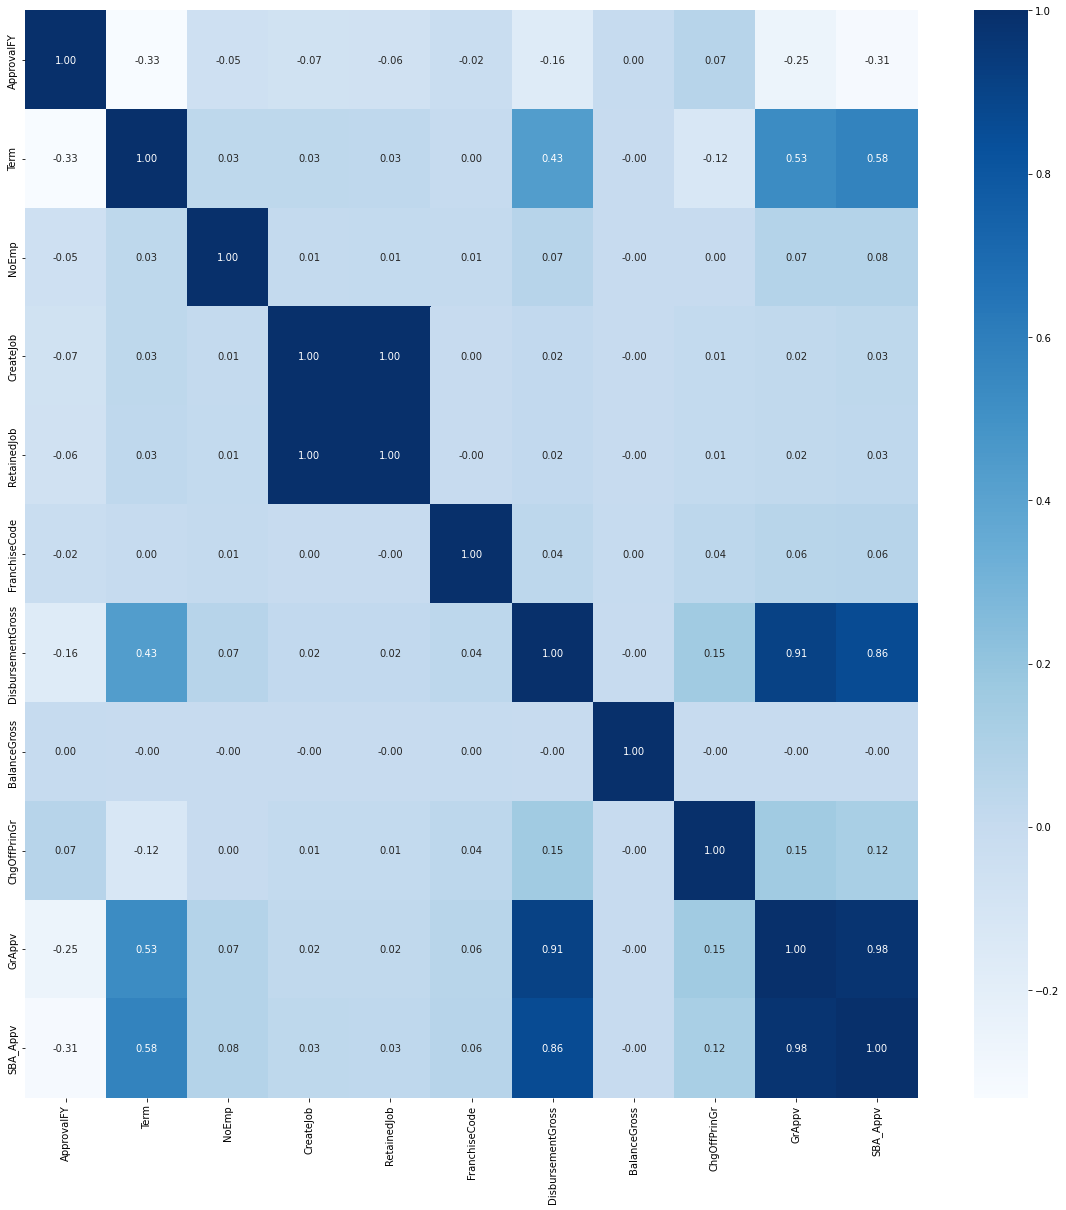

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(df[nums].corr(), cmap='Blues', annot=True, fmt='.2f')

In [ ]:
df_nums_drop = df[nums].drop(columns=['RetainedJob', 'GrAppv', 'CreateJob'])

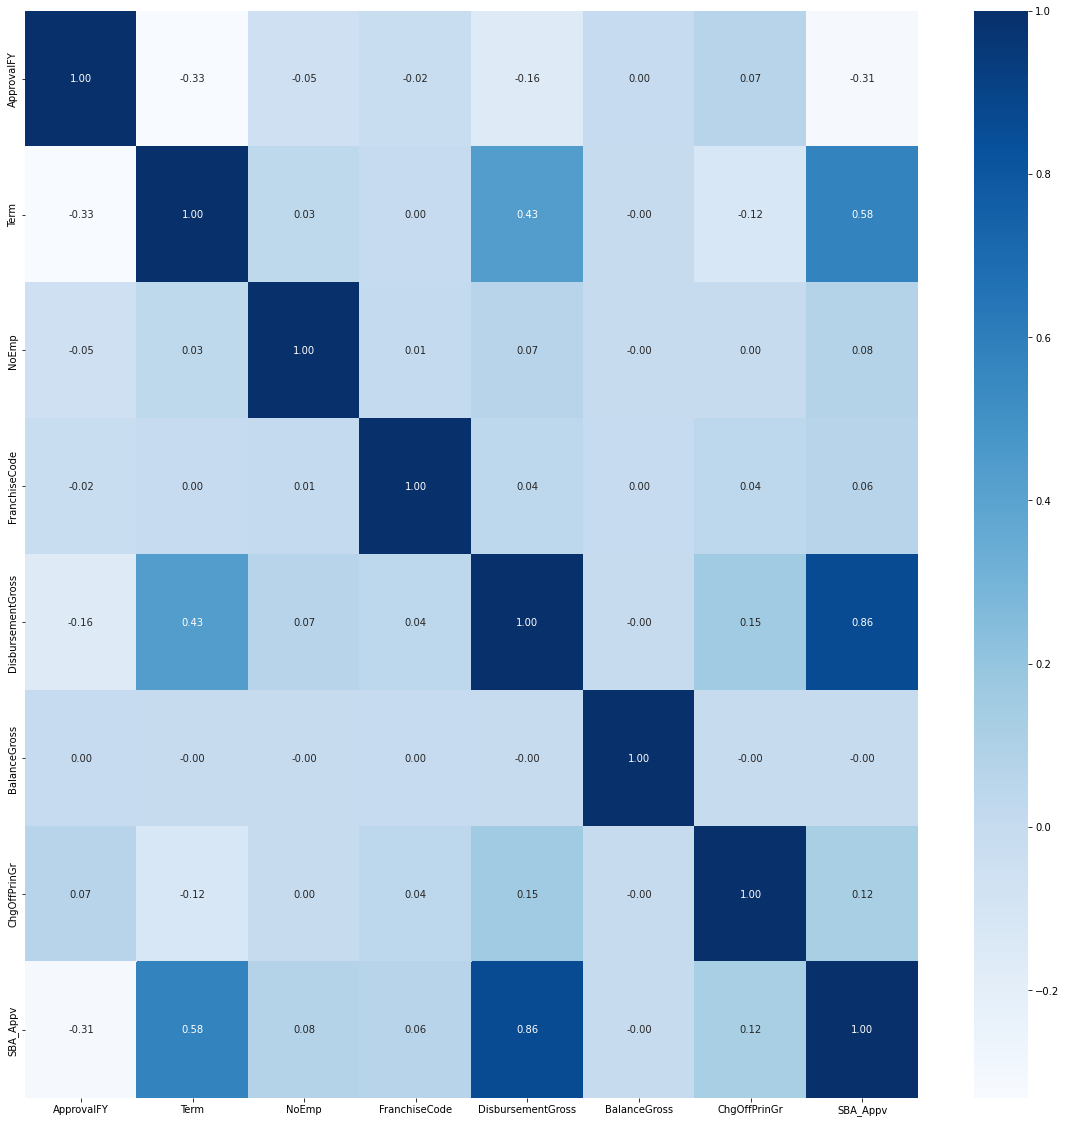

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_nums_drop.corr(), cmap='Blues', annot=True, fmt='.2f')

In [ ]:
nums_test=['ApprovalFY','Term', 'NoEmp', 'CreateJob', 'FranchiseCode','DisbursementGross', 'BalanceGross', 'ChgOffPrinGr','SBA_Appv']

In [ ]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features
def compute_vif(nums_test):
    
    X = df[nums_test]
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    
    return vif

compute_vif(nums_test)


,Variable,VIF
0,ApprovalFY,2.916913
1,Term,4.437540
2,NoEmp,1.023331
3,CreateJob,1.003704
4,FranchiseCode,1.051357
5,DisbursementGross,7.776634
6,BalanceGross,1.000014
7,ChgOffPrinGr,1.169538
8,SBA_Appv,9.117098


Untuk pasangan variabel numerik yang berkorelasi tinggi dapat dipilih dengan metode VIF. Variabel `ApprovalFY`,`Term`, `NoEmp`, `CreateJob`, `FranchiseCode`,`DisbursementGross`, `BalanceGross`, `ChgOffPrinGr`, dan `SBA_Appv` dapat digunakan untuk memprediksi target.

Nilai VIF yang kecil (<10) mengindikasikan variabel tersebut memiliki multikolinearitas yang rendah dengan variabel lainnya.

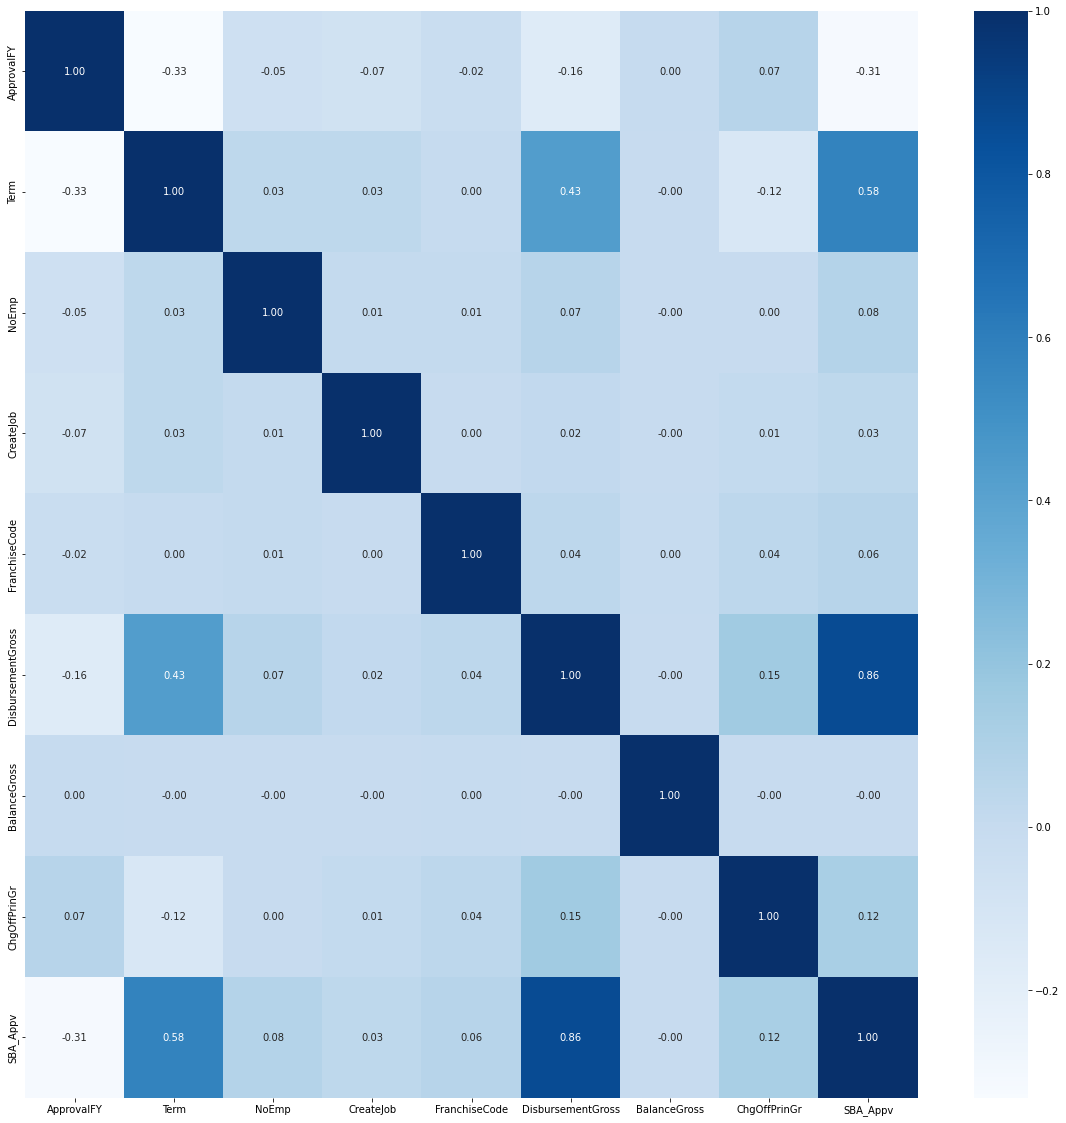

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(df[nums_test].corr(), cmap='Blues', annot=True, fmt='.2f')

##Feature Extraction (Membuat Feature baru dari Feature yang sudah ada)

Membuat feature `SBA_AppvPct` untuk mengetahui berapa besar jumlah pinjaman yang dicover oleh SBA dalam persen (%)

In [ ]:
df['SBA_AppvPct'] = df['SBA_Appv'] / df['GrAppv']

Membuat feature '`GreatRecession`' untuk melihat apakah pinjaman ini aktif saat periode resesi atau tidak

In [ ]:
#Membuat kolom baru yang menunjukkan tahun pinjaman cair
df['DisbursementFY'] = df['DisbursementDate'].map(lambda x: x.year)

In [ ]:
df['GreatRecession'] = np.where(((2007 <= df['DisbursementFY']) & (df['DisbursementFY'] <= 2009)), 1, 0)

Mengekstrak feature `Term` menjadi feature `RealEstate`. Feature ini menggambarkan pinjaman yang dijaminkan `RealEstate` pada umumnya memiliki periode >240 bulan

In [ ]:
df['RealEstate'] = np.where(df['Term'] >= 240, 1, 0)

Mengambil tahun pinjaman dicairkan dalam feature `DisbursementFY`

In [ ]:
df['DisbursementFY'] = df['DisbursementDate'].map(lambda x: x.year)

#Feature Tambahan

 Tuliskan minimal 4 feature tambahan (selain yang sudah tersedia di dataset) yang mungkin akan sangat membantu membuat performansi model semakin bagus (ini hanya ide saja, untuk menguji kreativitas teman-teman, tidak perlu benar-benar dicari datanya dan tidak perlu diimplementasikan)



*   Feature **Interest Rate**

Biasanya di Indonesia, hal seperti ini dikenal dengan Kredit Modal Kerja (KMK). Layanan ini disediakan oleh beberapa bank dengan sistem memberikan sejumlah pinjaman kepada para pengusaha kecil untuk mendukung usaha mereka. Lazimnya, bank dan instansi terkait akan mengenakan bunga bagi para peminjam. Rata-rata bank di Indonesia mengenakan bunga sebesar 10-15% per tahunnya tergantung jenis KMK. Menurut kami, hal ini bisa dijadikan feature untuk memperkaya dataset ini. 

Dengan adanya feature 'bunga', kita dapat mengukur seberapa besar keuntungan bunga yang didapatkan oleh bank dan instansi terkait (dalam hal ini perusahaan asuransi SBA) untuk memberikan pinjaman kepada calon peminjam. Jika tenor lebih lama dan jumlah pinjaman lebih besar, bunga yang dikenakan cenderung lebih besar. Jika dimasukkan ke rumus untuk memperoleh perhitungan jumlah bunga bisa didapatkan dari:

Jumlah awal pinjaman x suku bunga per tahun x jumlah tahun jangka waktu kredit/jumlah bulan dalam jangka waktu kredit.

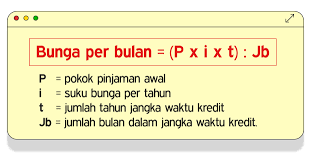

Sumber: https://www.ojk.go.id/id/kanal/perbankan/Pages/Suku-Bunga-dasar.aspx

*   Feature **Financing Needs atau Kebutuhan Pembiayaan**, bisa memiliki beberapa value yang disesuaikan dengan kebutuhannya seperti:
1. Time loan revolving (customer yang membutuhkan modal usaha berupa pembiayaan liquid (non musiman) atau musiman (berkala). Contohnya: Pabrik tekstil, kontraktor
2. Time loan insidentil (customer yang membutuhkan modal usaha berupa pembiayaan musiman (hanya 1x pinjaman). Contohnya: Distributor seragam sekolah, Distributor baju muslim
3. Installment loan (customer mengajukan pinjaman dan menggunakan keuntungan dari usahanya secara perlahan-lahan untuk membayar pinjaman tersebut sehingga pinjaman telah lunas dalam waktu 2 tahun misalnya)
Feature ini dinilai cukup penting bagi bank untuk mengetahui latar belakang dari pinjaman modal yang diajukan oleh calon pemodal. Bank juga bisa menimbang apakah pinjaman layak diberikan berdasarkan kondisi calon peminjam saat ini (bisa meminimalkan risiko).


*   Feature **Fees**
Feature ini berisi value yang menandakan fee yang harus dibayarkan oleh calon peminjam bisnis kecil setelah mengajukan pinjaman. Nantinya, hal ini bisa menjadi pertimbangan bagi SBA dan Bank dalam menerima loan karena bisa memberikan keuntungan bagi kita. Perhitungan fee sendiri biasanya didasarkan dari jumlah loan yang diajukan dan latar belakang dari bisnis tersebut.

*   Feature **Jumlah Pinalti**
Setelah peminjam dinyatakan default, akan lebih baik jika ditambahkan feature baru yang berisi jumlah pinalti yang harus dibayar oleh peminjam. Hal ini tentunya bisa menantu pihak bank dan SBA untuk melakukan pemantauan terhadap data yang ada. Jumlah pinalti ini bisa didasarkan dari kebijakan masing-masing, untuk pinjaman yang memiliki jaminan Real Estate, maka jaminan tersebut akan menjadi milik bank atau SBA itu sendiri.


